In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = 'FHV_Base_Aggregate_Report.csv'
trip_data_df = pd.read_csv(data)
trip_data_df.head()


,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,B00053,CHARGE AND RIDE INC,NaN,2019,6,June,681,0,34
1,B02699,PRESIDENTIAL LUXURY LIMO INC.,NaN,2016,7,July,1170,0,32
2,B01176,SANTO DOMINGO CAR LIMO SERVICES INC,NaN,2015,4,April,19429,0,88
3,B00837,CAREY LIMO N Y INC,NaN,2020,3,March,4673,0,146
4,B02191,US LIMO SYSTEM INC,NaN,2016,7,July,769,0,27


In [3]:
clean_df = trip_data_df.dropna(how="any")
clean_df.count()

Base License Number              6378
Base Name                        6378
DBA                              6378
Year                             6378
Month                            6378
Month Name                       6378
Total Dispatched Trips           6378
Total Dispatched Shared Trips    6378
Unique Dispatched Vehicles       6378
dtype: int64

In [4]:
clean_df.head()

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
6,B02641,AVENUE X CAR SERVICE INC.,PRESTIGE CAR SERVICE,2019,11,November,2465,0,15
8,B01381,CLASSIC CAR SERVICE CORP.,PAISA CLASSIC,2020,1,January,1631,0,17
10,B01039,NYC WHEELS CAR SERVICE INC.,COMMUNICARE CAR SERVICE,2018,11,November,6064,0,22
14,B02857,MATHES SERVICE INC.,NUNU ROCHDALE CAR SERVICE,2018,1,January,1748,0,7
15,B02655,LONG ISLAND CITY CAR AND LIMO INC.,A2B CORPORATE SEDAN,2015,4,April,19,0,6


In [5]:
uber_df = clean_df.loc[clean_df["Base Name"] == "UBER", :]
uber_df.head()

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
65,UBER,UBER,UBER,2018,8,August,14060879,4027450,72344
126,UBER,UBER,UBER,2015,3,March,2259575,0,14290
337,UBER,UBER,UBER,2015,12,December,4343828,0,28716
1746,UBER,UBER,UBER,2020,2,February,15743375,1102238,68833
2134,UBER,UBER,UBER,2015,1,January,1871075,0,12544


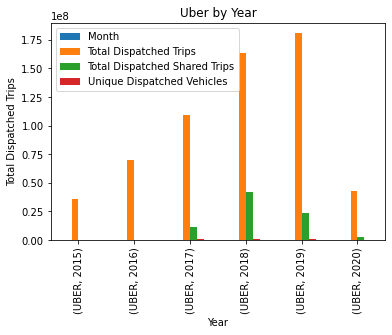

<Figure size 432x288 with 0 Axes>

In [6]:
uber_year = uber_df.groupby(['Base Name', 'Year'])
uber_year_df = uber_year.sum()
uber_year_df
uber_chart = uber_year_df.plot(kind="bar", title="Uber by Year")
uber_chart.set_xlabel("Year")
uber_chart.set_ylabel("Total Dispatched Trips")
plt.show()
plt.savefig("UberByYear.png")

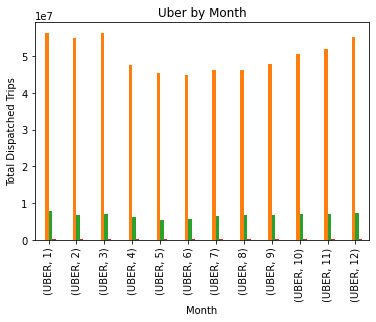

<Figure size 432x288 with 0 Axes>

In [7]:
uber_month = uber_df.groupby(['Base Name', 'Month'])
uber_month_df = uber_month.sum()
uber_month_df
uber_chart = uber_month_df.plot(kind="bar", title="Uber by Month", legend=False)
uber_chart.set_xlabel("Month")
uber_chart.set_ylabel("Total Dispatched Trips")
plt.show()
plt.savefig("UberByMonth.png")

In [8]:
lyft_df = clean_df.loc[clean_df["Base Name"] == "LYFT", :]

lyft_df.head()

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
49,LYFT,LYFT,LYFT,2017,2,February,1619126,0,21715
142,LYFT,LYFT,LYFT,2016,6,June,1073973,0,15095
305,LYFT,LYFT,LYFT,2018,9,September,3960252,641585,43686
500,LYFT,LYFT,LYFT,2018,5,May,3400356,540029,38628
570,LYFT,LYFT,LYFT,2015,10,October,434476,0,6657


In [9]:
lyft_groups = lyft_df.groupby(['Base Name', 'Year'])
lyft_sum = lyft_groups.sum()
lyft_sum.head(12)

Month  Total Dispatched Trips  Total Dispatched Shared Trips  \
Base Name Year                                                                 
LYFT      2015     72                 2615481                              0   
          2016     78                11415958                              0   
          2017     78                26361098                        3261655   
          2018     78                44823801                        7776283   
          2019     78                57891012                       14348593   
          2020     10                14976936                        3172456   

                Unique Dispatched Vehicles  
Base Name Year                              
LYFT      2015                       43196  
          2016                      162843  
          2017                      332211  
          2018                      494968  
          2019                      597261  
          2020                      139470

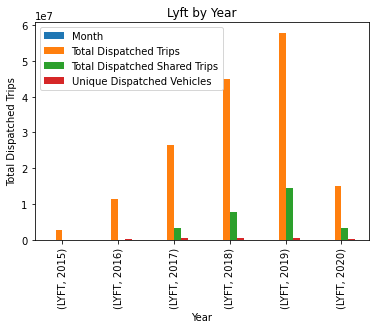

<Figure size 432x288 with 0 Axes>

In [10]:
lyft_chart = lyft_sum.plot(kind="bar", title="Lyft by Year")
lyft_chart.set_xlabel("Year")
lyft_chart.set_ylabel("Total Dispatched Trips")
plt.show()
plt.savefig("LyftByYear.png")

In [11]:
lyft_month = lyft_df.groupby(['Base Name', 'Month'])
lyft_month_sum = lyft_month.sum()
lyft_month_sum.head(12)

Year  Total Dispatched Trips  Total Dispatched Shared Trips  \
Base Name Month                                                                 
LYFT      1      10090                14888442                        2670817   
          2      10090                15460031                        3126142   
          3      10090                14003192                        2346218   
          4      12105                11422276                        1565832   
          5      10085                11111566                        1648567   
          6      10085                11858701                        2166911   
          7      10085                11738938                        2170453   
          8      10085                12434025                        2274206   
          9      10085                12568651                        2345116   
          10     10085                14044854                        3074330   
          11     10085                13595736                        2487795   
          12     10085                14957874                        2682600   

                 Unique Dispatched Vehicles  
Base Name Month                              
LYFT      1                          160704  
          2                          162184  
          3                          161145  
          4                          139098  
          5                          131838  
          6                          136209  
          7                          138819  
          8                          140462  
          9                          144515  
          10                         150271  
          11                         151058  
          12                         153646

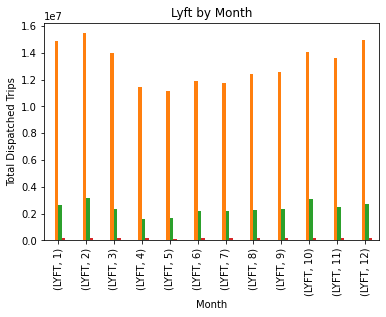

<Figure size 432x288 with 0 Axes>

In [12]:
lyft_month_chart = lyft_month_sum.plot(kind="bar", title="Lyft by Month", legend=False)
lyft_month_chart.set_xlabel("Month")
lyft_month_chart.set_ylabel("Total Dispatched Trips")
plt.show()
plt.savefig("LyftByMonth.png")

In [13]:
reduced_trip_df = trip_data_df[["Base Name", "Year", "Month", "Month Name", "Total Dispatched Trips"]]
reduced_trip_df.head()

,Base Name,Year,Month,Month Name,Total Dispatched Trips
0,CHARGE AND RIDE INC,2019,6,June,681
1,PRESIDENTIAL LUXURY LIMO INC.,2016,7,July,1170
2,SANTO DOMINGO CAR LIMO SERVICES INC,2015,4,April,19429
3,CAREY LIMO N Y INC,2020,3,March,4673
4,US LIMO SYSTEM INC,2016,7,July,769


In [14]:
cleaner_df = reduced_trip_df.dropna(how="any")
cleaner_df.count()

Base Name                 30526
Year                      30526
Month                     30526
Month Name                30526
Total Dispatched Trips    30526
dtype: int64

In [15]:
ubers_df = cleaner_df.loc[cleaner_df["Base Name"] == "UBER", :]
ubers_df.head()

,Base Name,Year,Month,Month Name,Total Dispatched Trips
65,UBER,2018,8,August,14060879
126,UBER,2015,3,March,2259575
337,UBER,2015,12,December,4343828
1746,UBER,2020,2,February,15743375
2134,UBER,2015,1,January,1871075


In [16]:
lyfts_df = cleaner_df.loc[cleaner_df["Base Name"] == "LYFT", :]

lyfts_df.head()

,Base Name,Year,Month,Month Name,Total Dispatched Trips
49,LYFT,2017,2,February,1619126
142,LYFT,2016,6,June,1073973
305,LYFT,2018,9,September,3960252
500,LYFT,2018,5,May,3400356
570,LYFT,2015,10,October,434476


In [17]:
dataframe_df = pd.DataFrame(trip_data_df, columns=["Base Name", "Year", "Month", "Month Name", "Total Dispatched Trips"])
dataframe_df.head()

uber_dataframe_df = dataframe_df.loc[dataframe_df["Base Name"] == "UBER", :]
uber_dataframe_df.head()



,Base Name,Year,Month,Month Name,Total Dispatched Trips
65,UBER,2018,8,August,14060879
126,UBER,2015,3,March,2259575
337,UBER,2015,12,December,4343828
1746,UBER,2020,2,February,15743375
2134,UBER,2015,1,January,1871075


In [18]:
lyft_dataframe_df = dataframe_df.loc[dataframe_df["Base Name"] == "LYFT", :]
lyft_dataframe_df.head()



,Base Name,Year,Month,Month Name,Total Dispatched Trips
49,LYFT,2017,2,February,1619126
142,LYFT,2016,6,June,1073973
305,LYFT,2018,9,September,3960252
500,LYFT,2018,5,May,3400356
570,LYFT,2015,10,October,434476


In [19]:
uber_lyft_df = pd.merge(uber_dataframe_df, lyft_dataframe_df, on="Year")
uber_lyft_df

,Base Name_x,Year,Month_x,Month Name_x,Total Dispatched Trips_x,Base Name_y,Month_y,Month Name_y,Total Dispatched Trips_y
0,UBER,2018,8,August,14060879,LYFT,9,September,3960252
1,UBER,2018,8,August,14060879,LYFT,5,May,3400356
2,UBER,2018,8,August,14060879,LYFT,10,October,4246575
3,UBER,2018,8,August,14060879,LYFT,3,March,3471602
4,UBER,2018,8,August,14060879,LYFT,12,December,4697772
...,...,...,...,...,...,...,...,...,...
695,UBER,2016,12,December,7880513,LYFT,12,December,1272827
696,UBER,2016,12,December,7880513,LYFT,10,October,1112748
697,UBER,2016,12,December,7880513,LYFT,8,August,1095428
698,UBER,2016,12,December,7880513,LYFT,5,May,994444


In [20]:
grouped_df = uber_lyft_df.rename(columns={"Base Name_x": "Uber",
                                          "Month_x": "Month Uber", 
                                          "Month Name_x": "Month Name Uber", 
                                          "Total Dispatched Trips_x": "Total Trips Uber",
                                          "Base Name_y": "Lyft",
                                         "Month_y": "Month Lyft", 
                                          "Month Name_y": "Month Name Lyft",
                                          "Total Dispatched Trips_y": "Total Trips Lyft"})
grouped_df

,Uber,Year,Month Uber,Month Name Uber,Total Trips Uber,Lyft,Month Lyft,Month Name Lyft,Total Trips Lyft
0,UBER,2018,8,August,14060879,LYFT,9,September,3960252
1,UBER,2018,8,August,14060879,LYFT,5,May,3400356
2,UBER,2018,8,August,14060879,LYFT,10,October,4246575
3,UBER,2018,8,August,14060879,LYFT,3,March,3471602
4,UBER,2018,8,August,14060879,LYFT,12,December,4697772
...,...,...,...,...,...,...,...,...,...
695,UBER,2016,12,December,7880513,LYFT,12,December,1272827
696,UBER,2016,12,December,7880513,LYFT,10,October,1112748
697,UBER,2016,12,December,7880513,LYFT,8,August,1095428
698,UBER,2016,12,December,7880513,LYFT,5,May,994444
